# **Twitch Top Streamers Data :-**

# `Description of the Project:-`
The dataset we will use contains information about different Twitch streams, including the watch time, stream time, peak viewers, average viewers, followers, and other relevant metrics. Our main focus is on predicting the number of followers gained by each stream, as it directly reflects their stream's growth and success.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

#Importing the Necessary Required Libraries

In [2]:
#read data from the CSV file "twitchdata-update.csv" using 'read_csv'
twitch_data = pd.read_csv("twitchdata-update.csv")

#head() method displays the first five rows
twitch_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


# `Describing different Columns of the Data Set:-`

1. Channel: The name of the Twitch channel.

2. Watch Time(minutes): Total minutes viewers spent watching the channel.
3. Stream Time(minutes): Total minutes the channel streamed content.
4. Peak Viewers: The maximum number of concurrent viewers during a stream.
5. Average Viewers: The average number of concurrent viewers during streams.
6. Followers: Total number of followers the channel has.
7. Followers Gained: Number of new followers gained during a specific period.
8. Views Gained: Number of new channel views gained during a specific period.
9. Partnered: Indicates if the channel is partnered with Twitch (True/False).
10. Mature: Indicates if the channel content is marked as mature (True/False).
11. Language: The language primarily used for the channel's content.
  





In [3]:
#tail() method of the dataframe displays the last five rows of the Dataset
twitch_data.tail()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English
999,Remx,122192850,99180,13788,1205,178553,59432,2049420,True,False,French


In [4]:
#sample(5) is used to randomly select and display 5 random rows (Subset of Data)
twitch_data.sample(5)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
493,AntoineDanielLive,238217145,54870,16671,3964,416920,272263,6778234,True,False,French
579,NeZaK_,205442370,134205,7262,1407,255840,207722,3017013,True,False,Italian
98,buster,884353800,59295,97838,14195,1087377,1052053,37351933,True,False,Russian
521,Alderiate,227675805,69030,11480,3337,319860,80730,5471250,True,False,French
873,AnniTheDuck,140975745,53220,7894,2533,460463,263210,7336341,True,True,German


# `Data Preprocessing:-`

In [5]:
#info() function in Pandas provides a concise summary of the DataFrame
twitch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [6]:
#provides information on central tendencies, dispersion, and shape of the distribution for each numerical column
twitch_data.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [7]:
#provides information about how the data is stored , i.e. numeric, string/object ,boolean type, etc.
twitch_data.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [8]:
#It returns a tuple representing the number of rows and columns in the DataFrame.
twitch_data.shape

(1000, 11)

In [9]:
#This list out all the Column Names Present in the Data Frame
twitch_data.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [10]:
#It provides the count of valid (non-null) data points in each column
twitch_data.count()

Channel                 1000
Watch time(Minutes)     1000
Stream time(minutes)    1000
Peak viewers            1000
Average viewers         1000
Followers               1000
Followers gained        1000
Views gained            1000
Partnered               1000
Mature                  1000
Language                1000
dtype: int64

In [11]:
#Checking For the Number of Duplicate Rows
duplicate_row_twitch_data = twitch_data[twitch_data.duplicated()]
print("THe number of duplicate rows are", duplicate_row_twitch_data.shape)

#Observation: No Duplicate Rows were Found

THe number of duplicate rows are (0, 11)


In [12]:
#To find the Number of Missing Values (null) in the DataFrame
print(twitch_data.isnull().sum())

#Observation: No Null Values Detected in the Data Frame

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64


# `Exploratory Data Analysis:-`
Exploratory Data Analysis (EDA) often includes the computation and visualization of mean, median, quartiles, minimum, and maximum values of the data. EDA is the process of examining and summarizing the main characteristics of a dataset to gain insights and understand its structure, patterns, and distributions.

In [13]:
#Mean() -> the mean represents the Average Value of the Data
twitch_data.mean()

Watch time(Minutes)     4.184279e+08
Stream time(minutes)    1.205152e+05
Peak viewers            3.706505e+04
Average viewers         4.781040e+03
Followers               5.700541e+05
Followers gained        2.055185e+05
Views gained            1.166817e+07
Partnered               9.780000e-01
Mature                  2.300000e-01
dtype: float64

In [14]:
#Median() -> the median is the middle most value of the Data when it is in order
twitch_data.median()

Watch time(Minutes)     234990787.5
Stream time(minutes)       108240.0
Peak viewers                16676.0
Average viewers              2425.0
Followers                  318063.0
Followers gained            98352.0
Views gained              6456323.5
Partnered                       1.0
Mature                          0.0
dtype: float64

In [15]:
#max return the highest value item in the Data frame
twitch_data.max()

Channel                 홍방장 (game2eye)
Watch time(Minutes)         6196161750
Stream time(minutes)            521445
Peak viewers                    639375
Average viewers                 147643
Followers                      8938903
Followers gained               3966525
Views gained                 670137548
Partnered                         True
Mature                            True
Language                       Turkish
dtype: object

In [16]:
#Returns the lowest value item in the Data Frame
twitch_data.min()

Channel                 10000DAYS
Watch time(Minutes)     122192850
Stream time(minutes)         3465
Peak viewers                  496
Average viewers               235
Followers                    3660
Followers gained           -15772
Views gained               175788
Partnered                   False
Mature                      False
Language                   Arabic
dtype: object

A histogram is a useful tool in data analysis and visualization because it provides a visual representation of the distribution of a continuous or discrete dataset. It displays the frequencies or counts of data points falling within specific intervals, or "bins," along the range of the data.

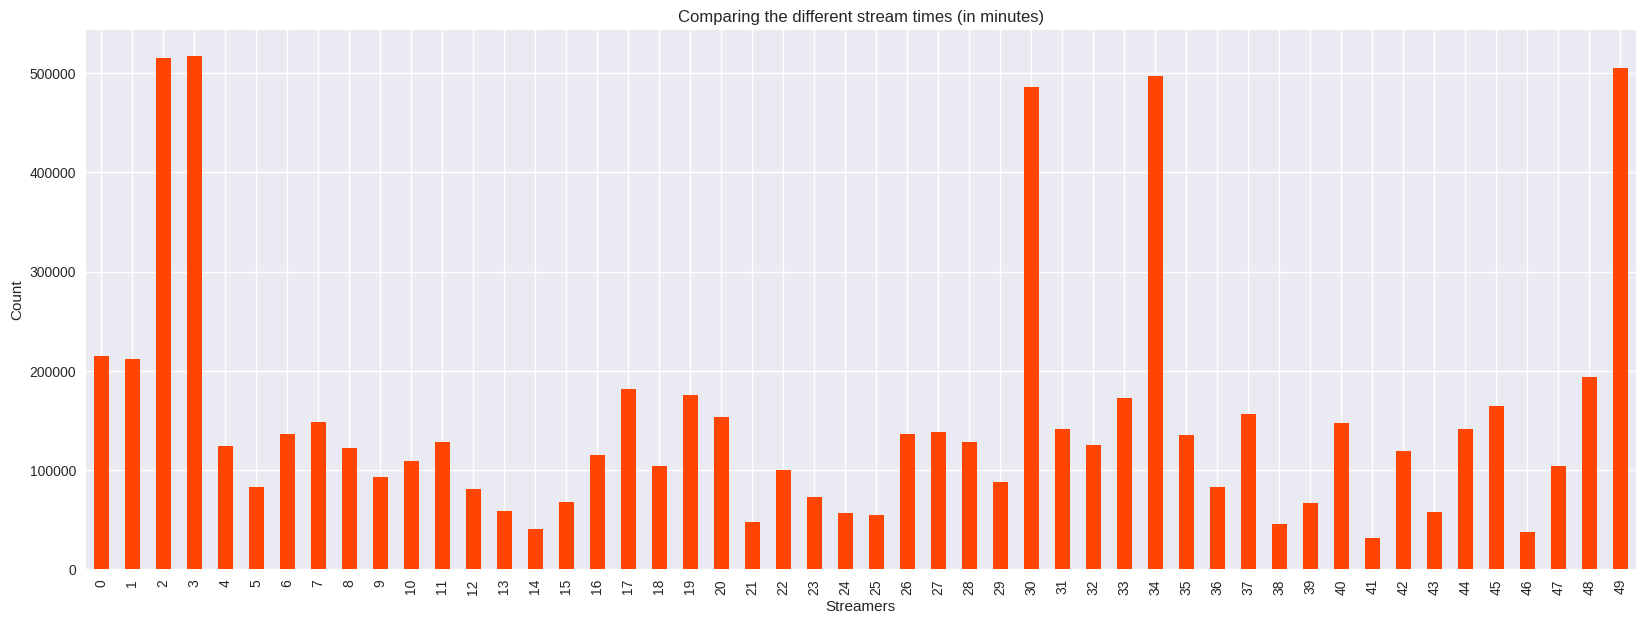

In [17]:
plt.style.use('seaborn') #checking the stream times of top 50 streamers
plt.figure(figsize = (20,7))
twitch_data['Stream time(minutes)'].head(50).plot.bar(color = 'orangered')
plt.title('Comparing the different stream times (in minutes)')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.show()

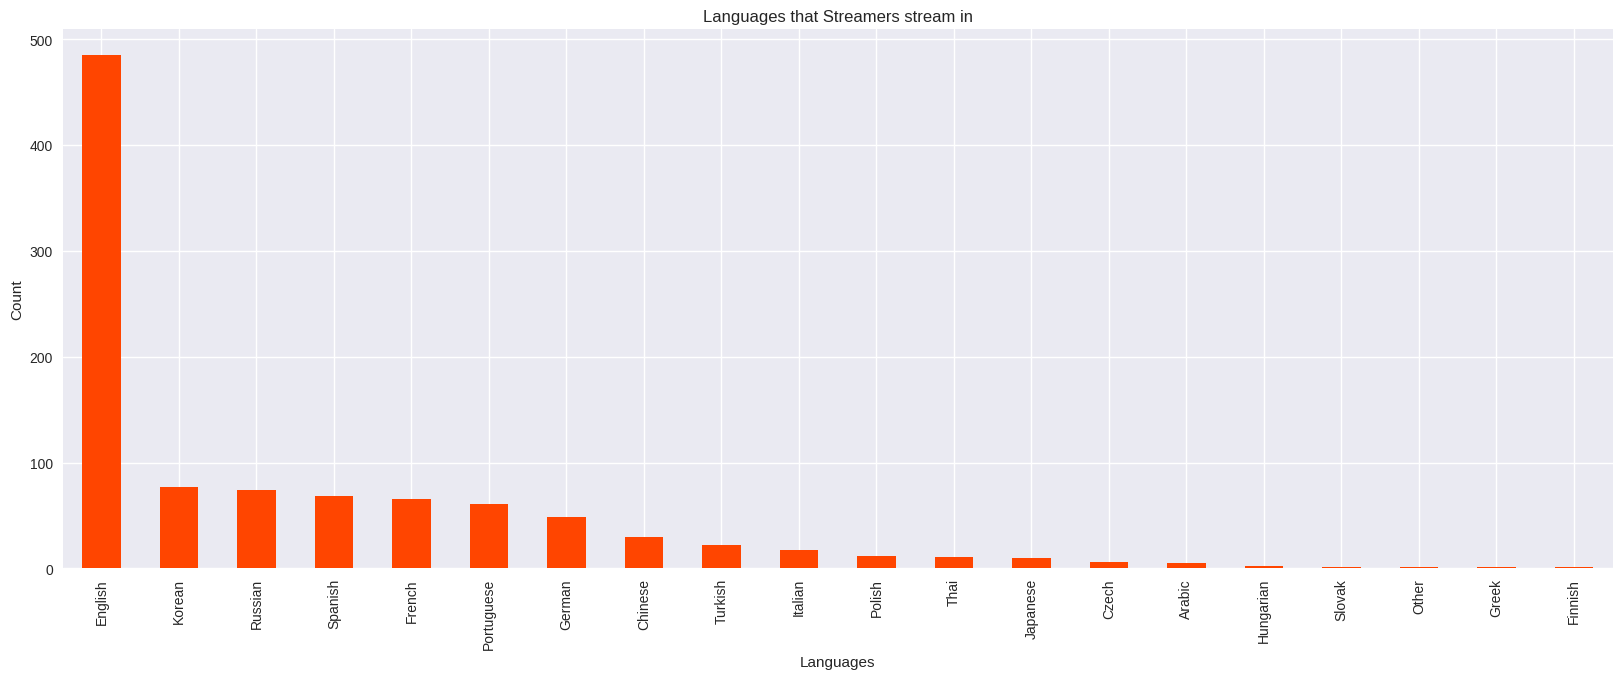

In [18]:
plt.style.use('seaborn') #checking the streamers that stream in a perticular language
plt.figure(figsize = (20,7))
twitch_data['Language'].value_counts().head(20).plot.bar(color = 'orangered')
plt.title('Languages that Streamers stream in')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Partnered', ylabel='count'>

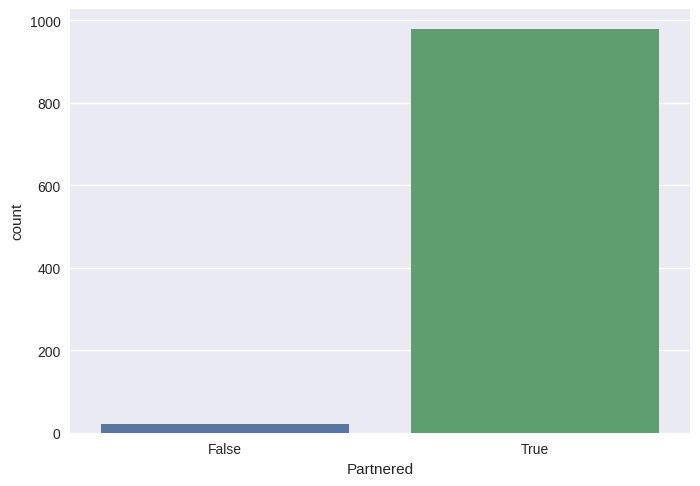

In [20]:
sns.countplot(x='Partnered',data = twitch_data) #checking how many are twitch partnered

In [21]:
#checking the top 10 streamers that are twitch partnered
twitch_data[twitch_data['Partnered'] == True][['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers']].head(10)

,Channel,Watch time(Minutes),Stream time(minutes),Followers
0,xQcOW,6196161750,215250,3246298
1,summit1g,6091677300,211845,5310163
2,Gaules,5644590915,515280,1767635
3,ESL_CSGO,3970318140,517740,3944850
4,Tfue,3671000070,123660,8938903
5,Asmongold,3668799075,82260,1563438
6,NICKMERCS,3360675195,136275,4074287
7,Fextralife,3301867485,147885,508816
8,loltyler1,2928356940,122490,3530767
9,Anomaly,2865429915,92880,2607076


<Axes: xlabel='Mature', ylabel='count'>

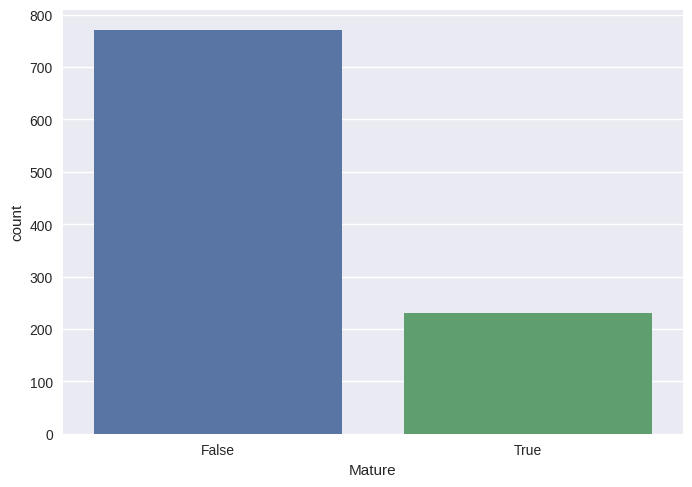

In [22]:
sns.countplot(x='Mature',data = twitch_data) #checking how many streams are tagged as mature

In [23]:
#checking the top 10 streamers with mature streams
twitch_data[twitch_data['Mature'] == True][['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers']].head(10)

,Channel,Watch time(Minutes),Stream time(minutes),Followers
2,Gaules,5644590915,515280,1767635
10,TimTheTatman,2834436990,108780,5265659
15,MontanaBlack88,2408460990,67740,2911316
16,sodapoppin,2329440420,115305,2786162
24,TheRealKnossi,1811696100,56010,1260160
32,MOONMOON,1527882945,124680,923448
42,ROSHTEIN,1435735725,118995,381918
45,Sardoche,1361024835,164235,746865
55,Gorgc,1252711830,141135,391726
63,Quin69,1186941750,174270,538532


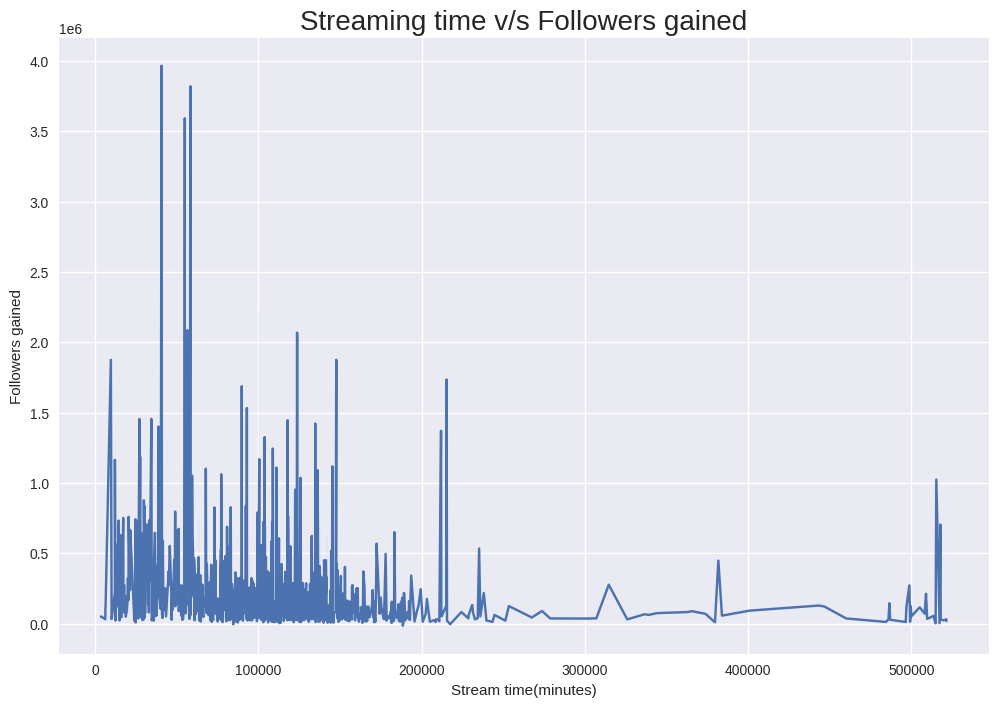

In [24]:
plt.figure(figsize=(12,8)) #comparing streaming time v/s followers gained
sns.lineplot(data=twitch_data, x='Stream time(minutes)', y='Followers gained', palette="Set1")
plt.title('Streaming time v/s Followers gained', fontsize = 20)
plt.show()

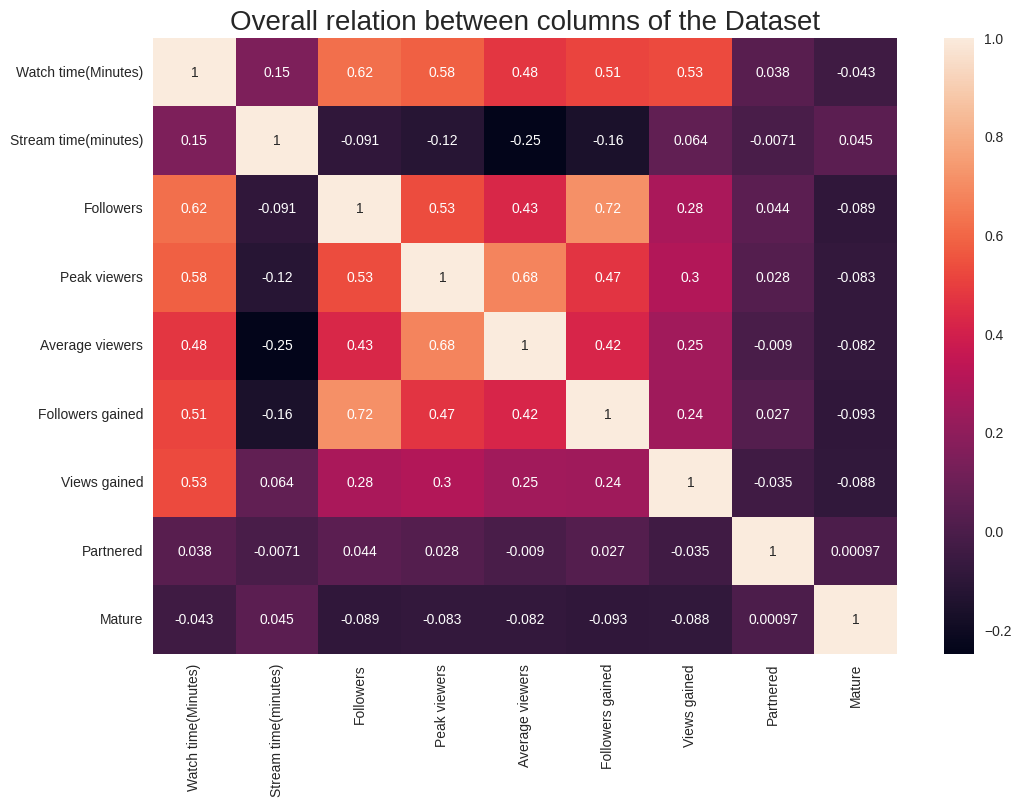

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(twitch_data[['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers','Peak viewers','Average viewers','Followers gained','Views gained','Partnered','Mature','Language']].corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()

In [26]:
def streamer(x): #method to check stats of an individual streamer
    return twitch_data.loc[twitch_data['Channel']==x]
name = input("Enter the Name of the Streamer whose Details you want to Check: ")
streamer(name)

Enter the Name of the Streamer whose Details you want to Check: ludwig


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
201,ludwig,525883695,94575,60346,5368,542580,505089,8508355,True,False,English


In [27]:
def lang(x): #method to check the details about a streamer that streams in a particular language
        return twitch_data[twitch_data['Language'] == x][['Channel','Followers','Partnered','Mature']].head(10)
language = input("Enter the Language of Streamer: ")
lang(language)

Enter the Language of Streamer: Spanish


,Channel,Followers,Partnered,Mature
13,Rubius,5751354,True,False
14,auronplay,3983847,True,False
25,TheGrefg,3795667,True,False
43,ibai,1894953,True,False
69,LVPes,587677,True,False
103,elded,2601858,True,False
105,juansguarnizo,1204773,True,False
129,ElmiilloR,426716,True,False
147,coscu,1865296,True,False
160,MYM_ALKAPONE,770535,True,False


In [28]:
def streamtime(x): #method to check the streamer that had the most streaming time in our data
    return twitch_data.loc[twitch_data['Stream time(minutes)']==x]
def watchtime(x): #method to check the streamer that had the most watch time in our data
    return twitch_data.loc[twitch_data['Watch time(Minutes)']==x]
def avgviewers(x): #method to check the streamer that had the most number of average viewers
    return twitch_data.loc[twitch_data['Average viewers']==x]
def follow(x): #method to check the streamer that had the most followers in our data
    return twitch_data.loc[twitch_data['Followers']==x]
def followgained(x): #method to check the streamer that had the most followers gained in our data
    return twitch_data.loc[twitch_data['Followers gained']==x]
def viewgained(x): #method to check the streamer that had the most views gained in our data
    return twitch_data.loc[twitch_data['Views gained']==x]

In [29]:
streamtime(twitch_data['Stream time(minutes)'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
392,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,True,False,English


In [30]:
watchtime(twitch_data['Watch time(Minutes)'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English


In [31]:
avgviewers(twitch_data['Average viewers'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English


In [32]:
follow(twitch_data['Followers'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [33]:
followgained(twitch_data['Followers gained'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish


In [34]:
viewgained(twitch_data['Views gained'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English


<Axes: xlabel='Followers'>

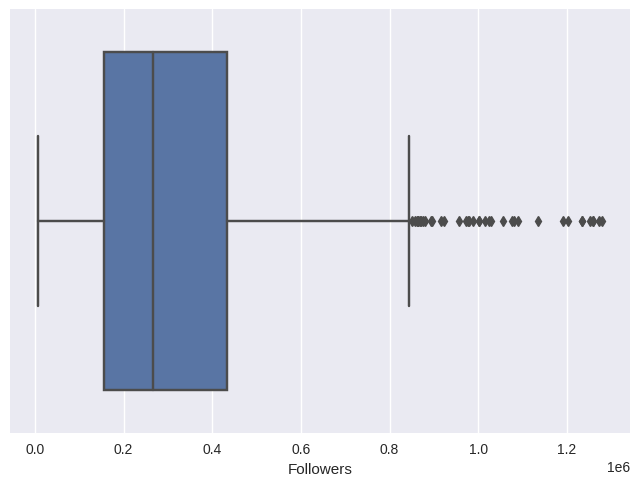

In [52]:
sns.boxplot(x=twitch_data['Followers'])

Filtering the Data to remove Outliers from the DataFrame using the Interquartile Range (IQR) method.

In [35]:
# Select only the numeric columns from twitch_data
numeric_columns = twitch_data.select_dtypes(include='number')
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Watch time(Minutes)     2.705500e+08
Stream time(minutes)    6.808500e+04
Peak viewers            2.845600e+04
Average viewers         3.328500e+03
Followers               4.537860e+05
Followers gained        1.923725e+05
Views gained            8.316160e+06
dtype: float64


In [36]:
twitch_data = twitch_data[~((twitch_data < (Q1 - 1.5 * IQR)) |(twitch_data > (Q3 + 1.5 * IQR))).any(axis=1)]
twitch_data.shape

(712, 11)

In [37]:
twitch_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
110,uzra,812362125,208785,14181,3683,185506,29752,20715640,True,False,Chinese
112,Thijs,794621265,108720,24923,7180,755116,68557,15548337,True,False,English
114,TeePee,789698115,170010,78741,4410,520519,238257,17102146,True,True,English
116,Agraelus,779867430,169515,23555,4642,414951,132125,20334558,True,True,Czech
122,Elajjaz,726000045,145755,13080,4922,346566,37883,12800182,True,False,English


# `Modelling:-`
Linear Regression is used to model the relationship between a dependent variable (y) and one or more independent variables (x).

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [39]:
#Dropping Unnecessary Columns
twitch_data = twitch_data.drop(['Channel', 'Partnered', 'Mature', 'Language'], axis = 1)
twitch_data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
110,812362125,208785,14181,3683,185506,29752,20715640
112,794621265,108720,24923,7180,755116,68557,15548337
114,789698115,170010,78741,4410,520519,238257,17102146
116,779867430,169515,23555,4642,414951,132125,20334558
122,726000045,145755,13080,4922,346566,37883,12800182


In [40]:
 #Independent Variables or input Features
x = twitch_data[['Watch time(Minutes)','Stream time(minutes)','Peak viewers','Average viewers','Followers','Views gained']]

#Dependent Variables or target Features
y = twitch_data['Followers gained']

In [41]:
#Splitting the Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [42]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
model  = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [44]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 13755916953.482517
Mean Absolute Error: 78320.11188811189
R-squared: -0.15458000009253836


In [45]:
#User Input
wth_time = float(input("Enter the Watch Time in mins: "))
str_time = float(input("Enter the Stream Time in mins: "))
peak_v = float(input("Enter the Peak Viewers: "))
avg_v = float(input("Enter the Average Viewers: "))
followers = float(input("Enter the Number of Followers: "))
view_gain = float(input("Enter the Views Gained in the Stream: "))
user_input = [[wth_time, str_time, peak_v, avg_v, followers, view_gain]]

Enter the Watch Time in mins: 6196161750
Enter the Stream Time in mins: 215250
Enter the Peak Viewers: 222720
Enter the Average Viewers: 27716
Enter the Number of Followers: 3246298
Enter the Views Gained in the Stream: 93036735


In [46]:
user_pred = model.predict(user_input)
print("Follower Gained by the streamer are:-",user_pred)

Follower Gained by the streamer are:- [37883]


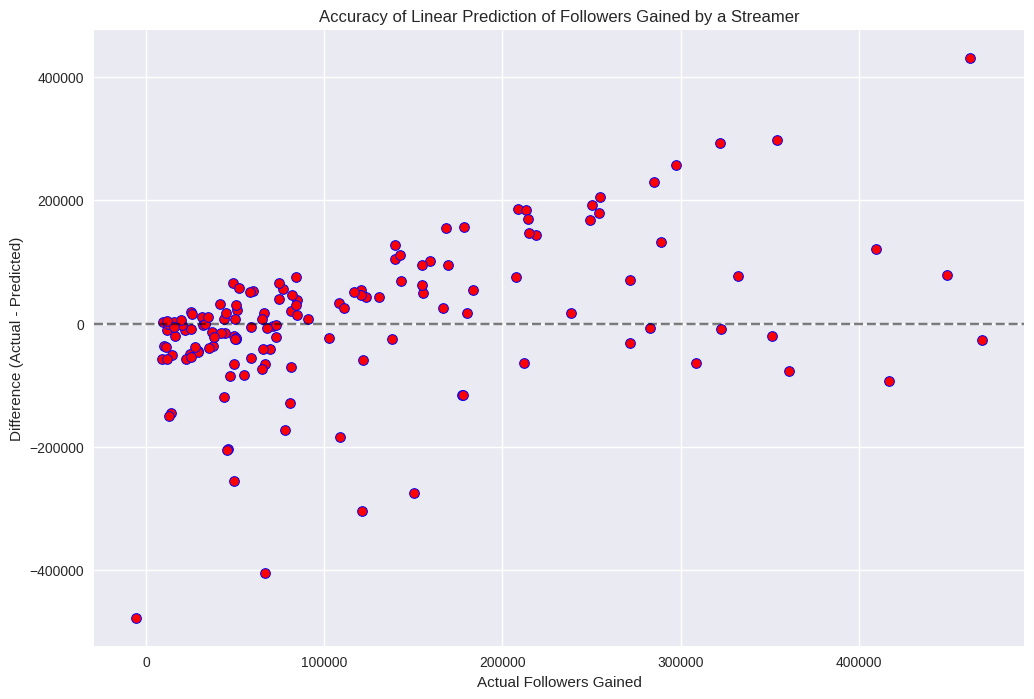

In [51]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Calculate the difference between actual and predicted followers gained
difference = y_test - y_pred

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(y_test, difference, color='red', edgecolor='blue', linewidth=0.7)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)  # Horizontal line at y=0
plt.xlabel('Actual Followers Gained')
plt.ylabel('Difference (Actual - Predicted)')
plt.title("Accuracy of Linear Prediction of Followers Gained by a Streamer")
plt.show()

# `Conclusion:-`
In this project, we aimed to build a prediction model using linear regression to forecast the number of followers gained by Twitch streams. We collected data containing various metrics related to different Twitch streams, such as watch time, stream time, peak viewers, average viewers, and the number of followers gained. The goal was to develop a model that accurately predicts followers gained, enabling streamers to understand their channel growth and administrators to assess stream performance on the platform.